Original notebook: <https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset>

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's



In [172]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and EDA

In [174]:
# data = pd.read_csv("archive.zip")
# data - bad delimiter

In [2]:
#Let load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS',
                'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B',
                'LSTAT', 'MEDV']

data = pd.read_csv("archive.zip", header=None, delimiter="\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
# Dimension of the dataset
np.shape(data)

(506, 14)

In [6]:
# Let's summarize the data to see the distribution of data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From get-go,  two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)  with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.

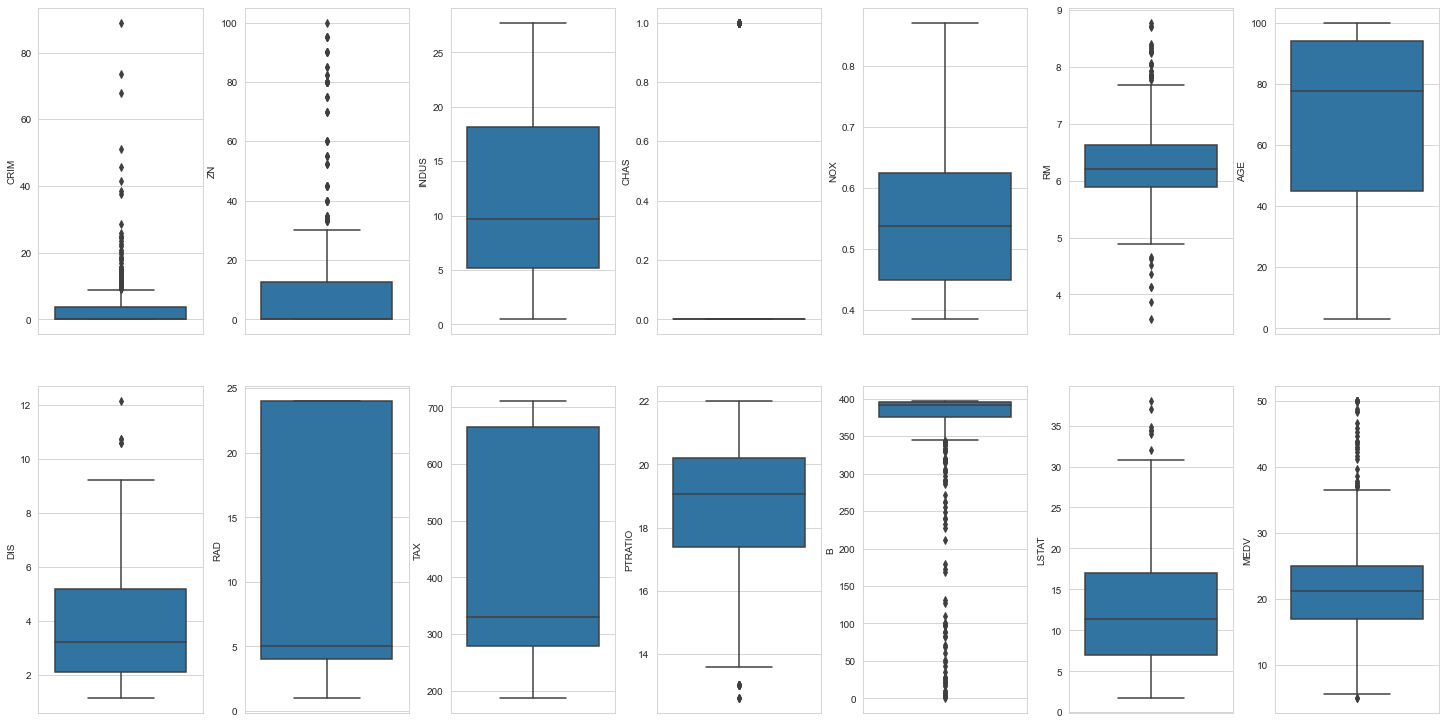

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
fig.patch.set_facecolor('xkcd:white')

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [181]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [8]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


Let's see how these features plus MEDV distributions looks like

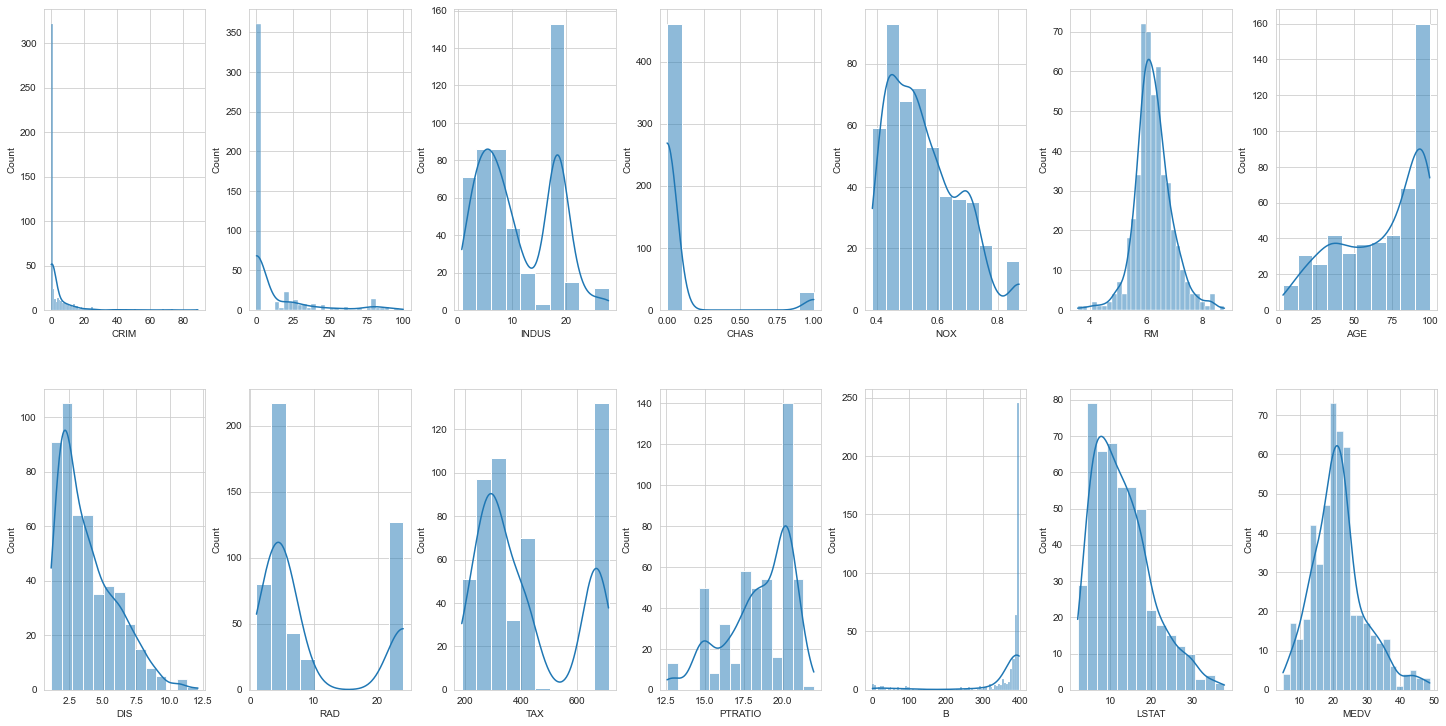

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
fig.patch.set_facecolor('xkcd:white')

<AxesSubplot:xlabel='TAX', ylabel='Count'>

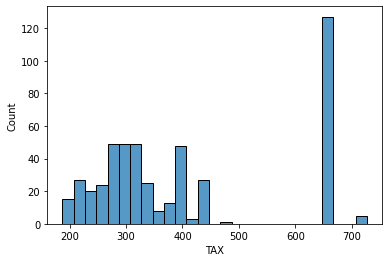

In [184]:
sns.histplot(data["TAX"], binwidth=20)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise  correlation on data.

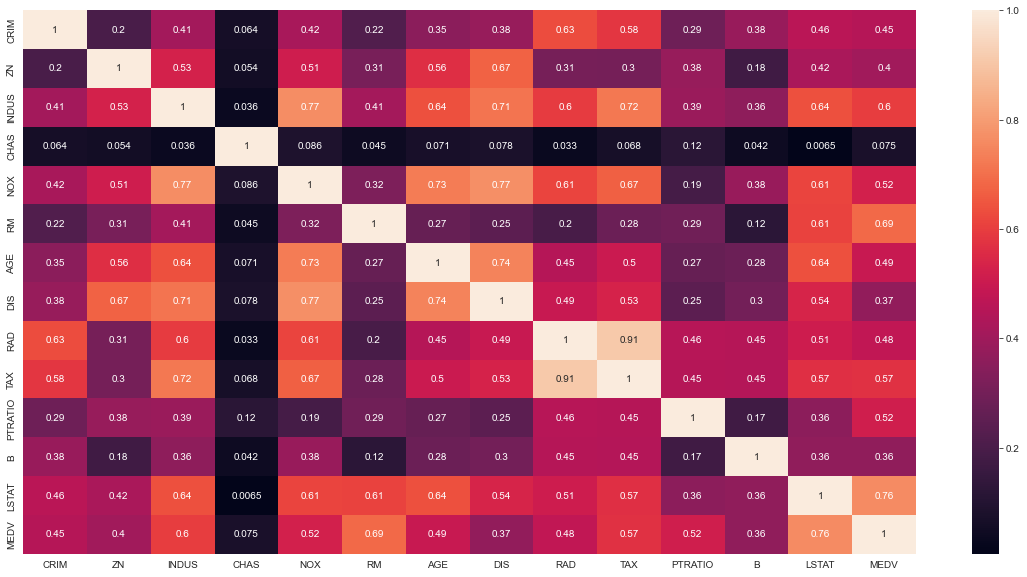

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True)
fig.patch.set_facecolor('xkcd:white')

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV. 

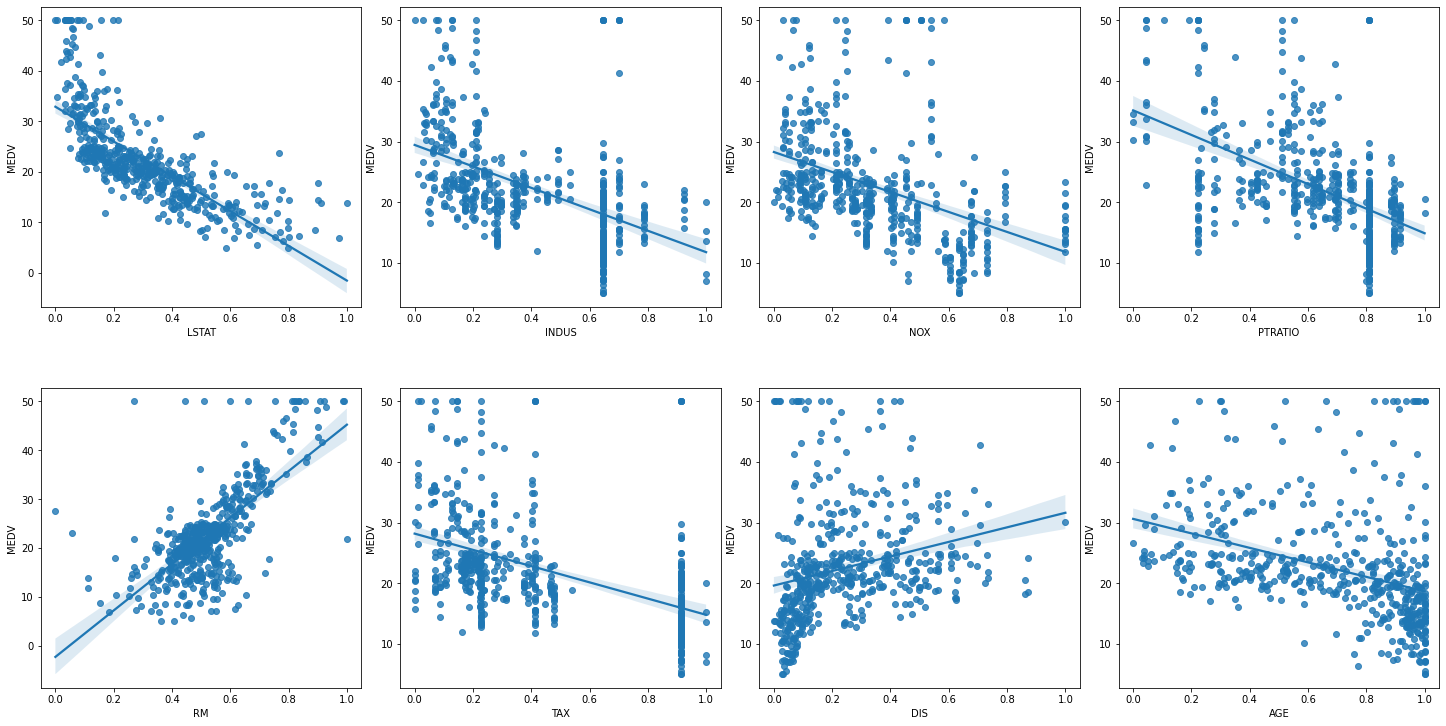

In [170]:
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:, column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.



# Feature things and models training

In [186]:
y = np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

Let's try Linear, Ridge Regression on dataset first.

In [1]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
kf = KFold(n_splits=10)

scores_map = {}

NameError: name 'preprocessing' is not defined

In [60]:
l_regression = linear_model.LinearRegression()

scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Linear Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")
scores_map['LinearRegression'] = scores

l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("Ridge Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

# Lets try polinomial regression with L2 with degree for the best fit


#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("Polynomial Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


Linear Regression:
MSE: -0.04 (+/- 0.04)


Ridge Regression:
MSE: -0.04 (+/- 0.04)


Polynomial Regression:
MSE: -0.03 (+/- 0.03)


The Liner Regression with and without L2 regularization does not make significant difference is MSE score. However polynomial regression with degree=3 has a better MSE. 

## Let's check degree search 

In [ ]:
print("Polynomial degree search.\n")
poly_scores = []
for degree in range(2, 11):
    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
    print("degree={}".format(degree))
    print("MSE: %0.4f (+/- %0.4f), median: %0.4f" % (scores.mean(), scores.std(), np.median(scores)))
    poly_scores.append((scores.mean(), scores.std(), np.median(scores)))

## Let's check variable selection

In [162]:
x_full = data.drop("MEDV", axis=1)
x_full_scaled = min_max_scaler.fit_transform(x_full)
x_full_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [163]:
x_full_scaled.shape

(506, 13)

In [164]:
scores_map_full = {}

In [165]:
l_regression = linear_model.LinearRegression()

scores = cross_val_score(l_regression, x_full_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Linear Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")
scores_map_full['LinearRegression'] = scores

l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_full_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_full['Ridge'] = scores
print("Ridge Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

# Lets try polinomial regression with L2 with degree for the best fit
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_full_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_full['PolyRidge'] = scores
print("Polynomial Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Linear Regression:
MSE: -34.71 (+/- 45.57)


Ridge Regression:
MSE: -31.02 (+/- 37.12)


Polynomial Regression:
MSE: -21.56 (+/- 28.06)


In [75]:
print("Polynomial degree search.\n")
poly_scores_full = []
for degree in range(2, 11):
    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
    scores = cross_val_score(model, x_full_scaled, y, cv=kf, scoring='neg_mean_squared_error')
    print("degree={}".format(degree))
    print("MSE: %0.4f (+/- %0.4f), median: %0.4f" % (scores.mean(), scores.std(), np.median(scores)))
    poly_scores_full.append((scores.mean(), scores.std(), np.median(scores)))

Polynomial degree search.

degree=2
MSE: -0.0323 (+/- 0.0362), median: -0.0182
degree=3
MSE: -0.0315 (+/- 0.0295), median: -0.0223
degree=4
MSE: -0.0332 (+/- 0.0286), median: -0.0250
degree=5
MSE: -0.0357 (+/- 0.0317), median: -0.0268
degree=6
MSE: -0.0383 (+/- 0.0380), median: -0.0253
degree=7
MSE: -0.0418 (+/- 0.0469), median: -0.0230
degree=8
MSE: -0.0472 (+/- 0.0576), median: -0.0224
degree=9
MSE: -0.0551 (+/- 0.0679), median: -0.0237
degree=10
MSE: -0.0667 (+/- 0.0793), median: -0.0252


In [84]:
pd.DataFrame(
    {"Poly viz select": ["MSE: {:.4} (+/- {:.4}), median: {:.4}".format(*score_stats) for score_stats in poly_scores],
     "Poly full": ["MSE: {:.4} (+/- {:.4}), median: {:.4}".format(*score_stats) for score_stats in poly_scores_full]})

,Poly viz select,Poly full
0,"MSE: -0.03488 (+/- 0.03108), median: -0.01976","MSE: -0.0323 (+/- 0.03623), median: -0.01822"
1,"MSE: -0.03422 (+/- 0.02714), median: -0.02449","MSE: -0.03147 (+/- 0.0295), median: -0.02233"
2,"MSE: -0.0348 (+/- 0.02658), median: -0.02875","MSE: -0.03318 (+/- 0.02862), median: -0.02495"
3,"MSE: -0.03478 (+/- 0.02657), median: -0.0303","MSE: -0.0357 (+/- 0.03173), median: -0.02677"
4,"MSE: -0.03508 (+/- 0.02683), median: -0.0304","MSE: -0.03835 (+/- 0.03796), median: -0.02528"
5,"MSE: -0.03606 (+/- 0.02745), median: -0.03004","MSE: -0.04183 (+/- 0.04693), median: -0.02302"
6,"MSE: -0.03737 (+/- 0.0284), median: -0.02952","MSE: -0.04717 (+/- 0.05757), median: -0.02243"
7,"MSE: -0.03861 (+/- 0.02933), median: -0.02885","MSE: -0.05505 (+/- 0.06788), median: -0.02368"
8,"MSE: -0.03958 (+/- 0.03), median: -0.0281","MSE: -0.06669 (+/- 0.07929), median: -0.02521"


## Let's try some non prametric regression techniques: SVR with kernal rbf, DecisionTreeRegressor, KNeighborsRegressor etc.

In [32]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.04 (+/- 0.03)


In [33]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.05 (+/- 0.04)


## Look in details at desicion tree

In [104]:
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(desc_tr)
except Exception as e:
    print(type(e))
    print(e)
else:
    print("Model is fitted alreasdy.")

<class 'sklearn.exceptions.NotFittedError'>
This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [107]:
desc_tr.fit(x_scaled, y)
desc_tr.score(x_scaled, y)

0.8807011427284248

It's a coefficient of determination R2. It is in different scale then MSE, i.e. from 0 to 1, higher is better.

About `score` method and other methods of the Desicion Tree Regression estimator class
<https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor>

In [111]:
from sklearn.metrics import mean_squared_error

print("Training error:")
mean_squared_error(y, desc_tr.predict(x_scaled))

Training error:


0.015529219222749703

Training error is almost always not greter then cross-validation error. So we should look on the cross-validation error in order to compare estimators.

In [112]:
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(desc_tr)
except Exception as e:
    print(type(e))
    print(e)
else:
    print("Model is fitted alreasdy.")

Model is fitted alreasdy.


In [115]:
desc_tr.feature_importances_

array([0.58768356, 0.00821053, 0.02940624, 0.03679652, 0.21569678,
       0.04100969, 0.08119668, 0.        ])

Let's add names of the features. We should track our preprocessing, if we want to get some interpetation.

In [121]:
pd.DataFrame({"variables": column_sels, "weights": desc_tr.feature_importances_}).sort_values(by="weights",
                                                                                              ascending=False)

,variables,weights
0,LSTAT,0.587684
4,RM,0.215697
6,DIS,0.081197
5,TAX,0.041010
3,PTRATIO,0.036797
2,NOX,0.029406
1,INDUS,0.008211
7,AGE,0.000000


In [128]:
pd.DataFrame({"variables": column_sels, "corr.abs": data.loc[:, column_sels].corrwith(data["MEDV"]).abs()}
             ).sort_values(by="corr.abs", ascending=False)

,variables,corr.abs
LSTAT,LSTAT,0.737663
RM,RM,0.695360
PTRATIO,PTRATIO,0.507787
INDUS,INDUS,0.483725
TAX,TAX,0.468536
NOX,NOX,0.427321
AGE,AGE,0.376955
DIS,DIS,0.249929


In [136]:
pd.concat([
    pd.DataFrame({"variables": column_sels, "weights": desc_tr.feature_importances_}).sort_values(by="weights",
                                                                                                  ascending=False
                                                                                                  ).reset_index(
        drop=True),
    pd.DataFrame({"variables": column_sels, "corr.abs": data.loc[:, column_sels].corrwith(data["MEDV"]).abs()}
                 ).sort_values(by="corr.abs", ascending=False
                               ).reset_index(drop=True)],
    axis=1)

,variables,weights,variables,corr.abs
0,LSTAT,0.587684,LSTAT,0.737663
1,RM,0.215697,RM,0.695360
2,DIS,0.081197,PTRATIO,0.507787
3,TAX,0.041010,INDUS,0.483725
4,PTRATIO,0.036797,TAX,0.468536
5,NOX,0.029406,NOX,0.427321
6,INDUS,0.008211,AGE,0.376955
7,AGE,0.000000,DIS,0.249929


### Continue with non-parametric regressions

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.04 (+/- 0.02)


Compared to three models which are shosen through grid search, SVR performes better. Let's try an ensemble method finally.

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9, learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2,
                                n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.03 (+/- 0.02)


Let's plot k-fold results to see which model has better distribution of results. Let's have a look at the MSE distribution of these models with k-fold=10

<AxesSubplot:>

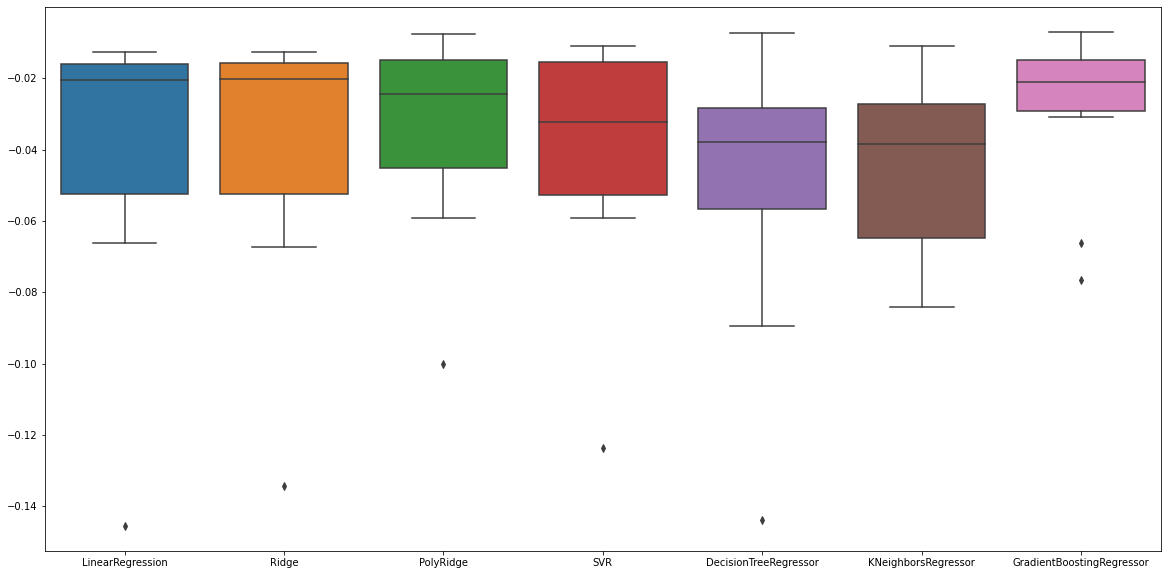

In [36]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

The models SVR and GradientBoostingRegressor show better performance with -11.62 (+/- 5.91) and -12.39 (+/- 5.86).

This is my first kernel and thanks to https://www.kaggle.com/vikrishnan for the dataset and the well writtten kernel that provdies great pointers into this dataset.

In [48]:
scores_map

,LinearRegression,Ridge,PolyRidge,SVR,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor
0,-0.015224,-0.015258,-0.022777,-0.040540,-0.031999,-0.036295,-0.020720
1,-0.015641,-0.013483,-0.009518,-0.010918,-0.007411,-0.011029,-0.006974
2,-0.012594,-0.012476,-0.039071,-0.024033,-0.044072,-0.026014,-0.012249
3,-0.022502,-0.020716,-0.026203,-0.051765,-0.043776,-0.041262,-0.024566
4,-0.030261,-0.029046,-0.014573,-0.012905,-0.028140,-0.030435,-0.021107
5,-0.018639,-0.019682,-0.007548,-0.014097,-0.018558,-0.040309,-0.014791
6,-0.016765,-0.017451,-0.016201,-0.019312,-0.029115,-0.020821,-0.014827
7,-0.145590,-0.134430,-0.099996,-0.123816,-0.089400,-0.084147,-0.076446
8,-0.066249,-0.067241,-0.059163,-0.059274,-0.143831,-0.072573,-0.066277
9,-0.059966,-0.060328,-0.047139,-0.053145,-0.060975,-0.083555,-0.030735


## Practical task

1. Apply Lasso or LARS regression to full feature dataset `x_full_scaled`. <https://stats.stackexchange.com/questions/4663/least-angle-regression-vs-lasso>
    1. Compare accuracy via MSE to the regressions with preliminary selected variables (Linear, Ridge, Polynomial).
    2. Compare selected features for selection regressions (Lasso, LARS) with preliminary selected variable list.
2. Calculate feature importance for Gradient Boosting.
    1. Plot feature importance.
    2. Compare feature importance order with preliminary selected variable list.
    
## Additional tasks
1. For Lasso, LARS regressions.
    3. Compare regression coefficients with correlation coeffcients. (They both could be treated as feature selection in particular cases).
    4. Perform regression modelling with different type of scaler: StandardScaler. Comare results.
2. For Gradient Boosting.
    3. Apply Gradient Boosting to non-scaled dataset without preliminary feature selection. Compare MSE accuracy and feature importance to the scaled and preliminary selected case.
3. For both groups of methods.
    1. Use different accuracy metric. Choose here (Regression section): <https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values>. Compare model ranking and feature importance with MSE metric.
    2. Compare correlations for transformed features with correlations of original features.
    3. Solve the `DIS` variable question. Leave just two most important varibles and apply regressions (parametric) and dicision tree to the rtuncated feature list. Compare results.
        1. Add Gradient Boosting to the comparison.

## tasks

### 1. Lasso and LARS regression and their comparison

In [155]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [156]:
x = data.loc[:, data.columns[:-1]]

In [159]:
y = data.loc[:, data.columns[-1]]

In [160]:
models = [linear_model.LinearRegression(), linear_model.Ridge(), linear_model.Lasso(alpha=10), linear_model.Lars()]
scalers = [None, preprocessing.StandardScaler(), preprocessing.MinMaxScaler()]
# poli_degrees = [i for i in range(1,6)]

In [187]:
for m in models:
    print('Model: ', m)
    for s in scalers:
        print('Scaler:', s)
        model = make_pipeline(s, m)
        scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')
        print(f'nMSE: {scores.mean()}, Variance:{scores.std()}')

Model:  LinearRegression()
Scaler: None
nMSE: -0.05013173373989736, Variance:0.05686409238668341
Scaler: StandardScaler()
nMSE: -0.05013173373989738, Variance:0.05686409238668341
Scaler: MinMaxScaler()
nMSE: -0.05013173373989739, Variance:0.05686409238668341
Model:  Ridge()
Scaler: None
nMSE: -0.04714584433270003, Variance:0.053503667133391504
Scaler: StandardScaler()
nMSE: -0.05004080297817367, Variance:0.056961950237160955
Scaler: MinMaxScaler()
nMSE: -0.04827944996484348, Variance:0.055911234805848836
Model:  Lasso(alpha=10)
Scaler: None
nMSE: -0.1655486283445406, Variance:0.13221366882890387
Scaler: StandardScaler()
nMSE: -0.1655486283445406, Variance:0.13221366882890387
Scaler: MinMaxScaler()
nMSE: -0.1655486283445406, Variance:0.13221366882890387
Model:  Lars()
Scaler: None
nMSE: -0.050131733739897356, Variance:0.056864092386683336
Scaler: StandardScaler()
nMSE: -0.050131733739897356, Variance:0.056864092386683385
Scaler: MinMaxScaler()
nMSE: -0.05013173373989734, Variance:0.0568

In [ ]:
# that higher return values are better than lower return values.

In [171]:
scores_map_full_my = {}
l_regression = linear_model.LinearRegression()

scores = cross_val_score(l_regression, x_full_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Linear Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")
scores_map_full_my['LinearRegression'] = scores

l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_full_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_full_my['Ridge'] = scores
print("Ridge Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_full_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_full_my['PolyRidge'] = scores
print("Polynomial Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

l_lasso = linear_model.Lasso()
scores = cross_val_score(l_lasso, x_full_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_full_my['Lasso'] = scores
print("Lasso Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

l_lars = linear_model.Lars()
scores = cross_val_score(l_lars, x_full_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_full_my['LARS'] = scores
print("Lars Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

Linear Regression:
MSE: -34.71 (+/- 45.57)


Ridge Regression:
MSE: -31.02 (+/- 37.12)


Polynomial Regression:
MSE: -21.56 (+/- 28.06)


Lasso Regression:
MSE: -75.34 (+/- 57.94)


Lars Regression:
MSE: -39.69 (+/- 44.00)




In [99]:
scores_map_selected_my = {}
l_regression = linear_model.LinearRegression()

scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Linear Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")
scores_map_selected_my['LinearRegression'] = scores

l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_selected_my['Ridge'] = scores
print("Ridge Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_selected_my['PolyRidge'] = scores
print("Polynomial Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

l_lasso = linear_model.Lasso(alpha=1)
scores = cross_val_score(l_lasso, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_selected_my['Lasso'] = scores
print("Lasso Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

l_lars = linear_model.Lars()
scores = cross_val_score(l_lars, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map_selected_my['LARS'] = scores
print("Lars Regression:")
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("\n")

Linear Regression:
MSE: -0.04 (+/- 0.04)


Ridge Regression:
MSE: -0.04 (+/- 0.04)


Polynomial Regression:
MSE: -0.03 (+/- 0.03)


Lasso Regression:
MSE: -0.15 (+/- 0.11)


Lars Regression:
MSE: -0.04 (+/- 0.04)




In [100]:
# Compare regression coefficients with correlation coeffcients. (They both could be treated as feature selection in particular cases).

In [151]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [101]:

l_lasso.fit(x_scaled, y).coef_

array([-0., -0., -0., -0.,  0., -0.,  0., -0.])

In [98]:
l_lars.fit(x_scaled, y).coef_

array([-0.94244931,  0.00912252, -0.27369151, -0.3019333 ,  0.47310299,
       -0.20406972, -0.34232303, -0.00962712])

In [102]:
l_lasso.fit(x_full_scaled, y).coef_  # what the hell?!

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [103]:
l_lars.fit(x_full_scaled, y).coef_

array([-0.8221129 ,  0.09253607,  0.02382574,  0.04262163, -0.29614856,
        0.49378295, -0.04587268, -0.45189107,  0.27415166, -0.33038719,
       -0.32292101,  0.1428959 , -0.81134148])